This is an example of how to compute the entropy of a pre-made circuit.

In [1]:
from supercliffords.circuits import ThreeQuarterCircuit
import matplotlib.pyplot as plt
import stim
from supercliffords.gates import ZH, C3

Now build the circuit class:

In [2]:
n_qubits = 120
slow = 10 #Act on 1/10 of the qubits per time step.
circuit = ThreeQuarterCircuit(n_qubits, slow)

Next, prepare the parameters for simulating the circuit and calculating the entropy:


In [3]:
t = 200
cut = 40
res = 1
rep = 10

S, ts = circuit.compute_entropy(t, cut, res, rep)

Now plot the entropy.

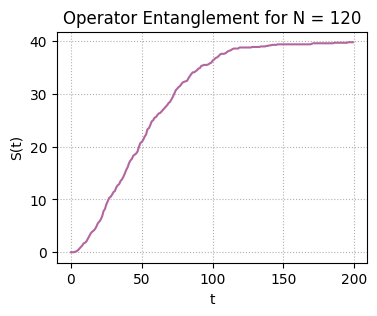

In [4]:
plt.figure(figsize=(4,3))
plt.plot(ts, S, color="#b3669e")
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title(f'Operator Entanglement for N = {n_qubits}')
plt.grid(linestyle = 'dotted')
plt.show()  

Next, we can also compute the OTOC for the same circuit. To do this we need to define a perturbation operator V(0) (which must be a super clifford), as a stim stabilizer tableau.

In [5]:
s = stim.TableauSimulator()
c = stim.Circuit()
c.append_operation("I", [n_qubits-1]) #Need to initialize the tableau with correct number of qubits, otherwise otoc calculation will fail.
s.do(c)
s.do(C3(0, 1, 2))

otoc, ts = circuit.compute_otoc(t, res, rep, s)

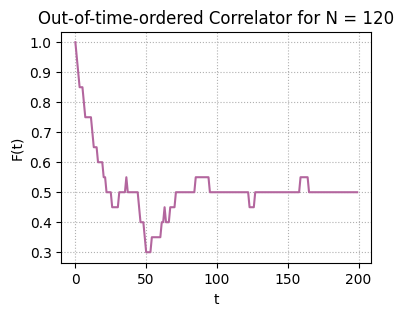

In [6]:
plt.figure(figsize=(4,3))
plt.plot(ts, otoc, color="#b3669e")
plt.xlabel('t')
plt.ylabel('F(t)')
plt.title(f'Out-of-time-ordered Correlator for N = {n_qubits}')
plt.grid(linestyle = 'dotted')
plt.show()  